# Logistic Regression

Checkpoint -----> [ABIDINE M'hamed Bilal] 
In this checkpoint, we worked again on the Titanic data set, but this time we will use logistic regression to predict Discrete values if a passenger will survive or not. 

# Getting the train data

In [6]:
# survival:    Survival 
# PassengerId: Unique Id of a passenger. 
# pclass:    Ticket class     
# sex:    Sex     
# Age:    Age in years     
# sibsp:    # of siblings / spouses aboard the Titanic     
# parch:    # of parents / children aboard the Titanic     
# ticket:    Ticket number     
# fare:    Passenger fare     
# cabin:    Cabin number     
# embarked:    Port of Embarkation


# importing  packages
import pandas as pd
import seaborn as sns;
from sklearn.preprocessing import LabelEncoder

# making data frame from csv file 
df=pd.read_csv('titanic-passengers.csv', sep=';')


In [7]:
# The number of samples into the train data is 891.
print('The number of samples into the dataset is {}.'.format(df.shape[0]))

The number of samples into the dataset is 891.


# Data processing

In [8]:
df['Age'] = df['Age'].fillna((df['Age'].median()))
df["Embarked"].fillna("S", inplace=True)
# We remove some columns that we are not going to use for our model.
df.drop(['PassengerId', 'Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)

encoder = LabelEncoder()
df['Survived'] = encoder.fit_transform(df['Survived'])
df['Sex'] = encoder.fit_transform(df['Sex'])
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,2,1,28.0,0,0,13.0000
1,0,3,1,25.0,0,0,7.6500
2,0,3,1,20.0,0,0,7.8542
3,0,3,0,29.0,0,4,21.0750
4,0,1,1,31.0,1,0,52.0000


# Train and build Classifier

Now our dataset is ready for the model.
X will contain all the features and y will contain the target variable

In [9]:
# We will use train_test_split from cross_validation module to split our data. 
# 70% of the data will be training data and %30 will be testing data.
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
# X will contain all the features and y will contain the target variable
# # create X (features) and y (response)
train=df
X = train.drop("Survived",axis=1)
y = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)                                            

In [15]:
# Let’s use Logistic Regression to train the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

# Classification Report

In [16]:
# Let’s see how accurate is our model for predictions
# In the above report, we have Precision, Recall, F1-Score for both 0 & 1 classes separately.
# his is a summary of metrics for each class.

predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print("Classification Report: ")
print(classification_report(y_test, predictions))

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       158
           1       0.78      0.72      0.75       110

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



We got 80% accuraccy, not bad. Let’s see the confusion matrix

# Confusion Matrix to validate the model

The predictions of our classification model will fall under any of this below categories:
· True Positive TP: Actual Value is Positive; Predicted values is Positive
· True Negative TN: Actual value is Negative; Predicted value is Negative
· False Positive FP: Actual value is Negative; But the model gives Positive which is a wrong prediction.
· False Negative FN: Actual value is Positive; But the model gives Negative which is a wrong prediction.

In [12]:
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

confusion_matrix(y_test, predictions)

array([[136,  22],
       [ 31,  79]], dtype=int64)

True positive: 136 (We predicted a positive result and it was positive)
True negative: 79 (We predicted a negative result and it was negative)
False positive: 22 (We predicted a positive result and it was negative)
False negative: 31 (We predicted a negative result and it was positive)

# Classification Accuracy

In [17]:
# Accuracy of training-set
logmodel.score(X_train,y_train)

0.7993579454253612

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score

# Accuracy of test-set
# This metric measures the ratio of correct predictions over the total number of predictions.
# For Higher accuracy, the model gives best.
print(accuracy_score(y_test,predictions))

0.8022388059701493


In [21]:
# Accuracy of test-set
logmodel.score(X_test,y_test)

0.8022388059701493

# ROC Curve & AUC Score

Another validation matrix for classification is ROC/AUC, we explain them, and apply them in our case (Logistic Regression).

Recall/Sensitivity/True Positive Rate:
Sensitivity describes how good a model at predicting positive classes.
TPR = TP/P = TP / (TP + FN)
Specificity/Selectivity/True Negative Rate:
Specificity describes how good a model at predicting positive classes.
TNR = TN/N = TN / (TN+ FP)

ROC Curve:
ROC (Receiver Operating Characteristic) curve is a visualization of false positive rate (x-axis) and the true positive rate (y-axis).
Even though we have the Sensitivity rate to find the goodness in predicting positive results, ROC curve gives a visualization to understand better. Each point on the ROC curve represents a sensitivity/specificity pair.
The Blue dashed line is the random classifier i.e. 50% of chance for each class which is worthless.

The closer the curve follows the left side border and the top border, the more accurate the test.
The closer the curve is to the 45-degree diagonal, the less accurate the test.
If the curve, goes high to reach the top left corner then the curve will cover more area under it. This area is calculated and denoted as AUC (Area Under ROC Curve) score or AUROC score.
If the AUC score is 0.5 then the curve is nothing but the random selection.
If the AUC score is 1 then all the area is correct predictions. i.e. Perfect model.
Higher the AUC score, better the model.


AUC Score: 0.87


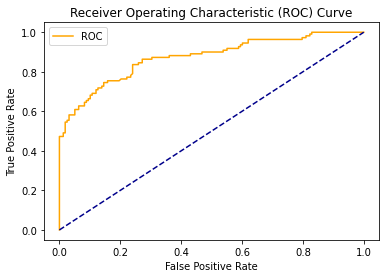

In [23]:
import matplotlib.pyplot as plt

pred_prob = logmodel.predict_proba(X_test)
probs = pred_prob[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC Score: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()